<a href="https://colab.research.google.com/github/arulbenjaminchandru/Python-and-Gen-AI/blob/main/Retrieval_Augmented_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Retrieval-Augmented Generation (RAG)**

**Retrieval-Augmented Generation (RAG)** is a powerful approach that combines the strengths of information retrieval with generative AI models. It enhances the model's ability to generate more accurate and contextually relevant answers by incorporating real-time retrieval of external knowledge. This hybrid method is particularly useful for tasks requiring up-to-date or specialized information that might not be captured within a generative model's static knowledge base.



#### **How RAG Works**

RAG integrates two components:
1. **Retrieval**: The AI retrieves relevant information or documents from external sources (like databases, search engines, or document stores) based on a user's query.
2. **Generation**: The retrieved information is then passed to a generative model (such as GPT, Claude, or similar models), which uses this data to create a coherent, detailed response.

This two-step process allows the model to access current information and generate content that is not limited to its pre-trained knowledge, making it ideal for tasks like customer support, research, or dynamic content generation.



#### **Key Steps in RAG**

1. **Query Understanding**: The model interprets the user query and decides what type of information is needed.
2. **Information Retrieval**: The system searches a connected database or knowledge repository for the most relevant documents or facts.
3. **Document Ranking**: The retrieved documents are ranked based on relevance to the query.
4. **Answer Generation**: The generative model uses the top-ranked documents to create a response that is more informed and contextually accurate than if it relied on pre-trained data alone.



#### **Example of RAG in Action**

**Use Case**: Generating answers to medical queries

Without RAG:
- A model trained up to a certain date may not have the latest medical research.
- It generates answers based solely on the information it was trained on, possibly leading to outdated or incomplete responses.

With RAG:
- The model can retrieve the latest medical papers, clinical guidelines, or research articles in real time.
- It then uses this up-to-date information to provide a more accurate, evidence-based response.

**Query Example**: "What are the latest treatments for Type 2 diabetes?"
- The RAG system retrieves recent medical papers or drug approvals from trusted sources.
- The generative model then synthesizes the retrieved information into a detailed, current response.



#### **Benefits of RAG**

1. **Up-to-Date Information**: RAG enables models to provide real-time information, overcoming the limitations of static training data.
2. **Improved Accuracy**: By combining external retrieval with generation, responses are more precise, especially for specialized or niche domains.
3. **Customizable Knowledge Base**: Organizations can use RAG to train models on proprietary or domain-specific datasets, such as company documents, product manuals, or legal codes.
4. **Reduced Hallucination**: Since generative models can sometimes "hallucinate" (produce incorrect or fabricated information), RAG mitigates this by grounding responses in actual retrieved data.



#### **Practical Applications of RAG**

1. **Customer Support**: RAG can provide detailed answers to customer queries by retrieving relevant knowledge from FAQ databases or internal documents, ensuring responses are accurate and aligned with company policies.
   
2. **Research Assistance**: RAG is highly useful in fields like law, healthcare, and academia, where real-time access to updated research or case laws is essential.

3. **Personalized Recommendations**: By retrieving user-specific information, such as previous interactions or preferences, RAG systems can generate more personalized and context-aware recommendations.

4. **Search-Augmented Chatbots**: Chatbots using RAG can handle complex questions by retrieving and integrating real-time data from external sources such as web pages, databases, or APIs.



#### **RAG Architecture**

The architecture of a RAG system typically includes:

- **Retrieval Component**: This can be a vector search engine like Elasticsearch, Pinecone, or FAISS, or even a traditional keyword-based search engine.
- **Generative Component**: Large Language Models (LLMs) such as GPT-4, LLaMA, or Claude, which are capable of generating fluent and coherent text.
- **Document Embeddings**: The documents or data being retrieved are transformed into embeddings (numerical representations) for efficient search and matching.
- **Scoring and Ranking**: Once documents are retrieved, a ranking mechanism (e.g., BM25 or cosine similarity) ensures the most relevant documents are used for the generation phase.

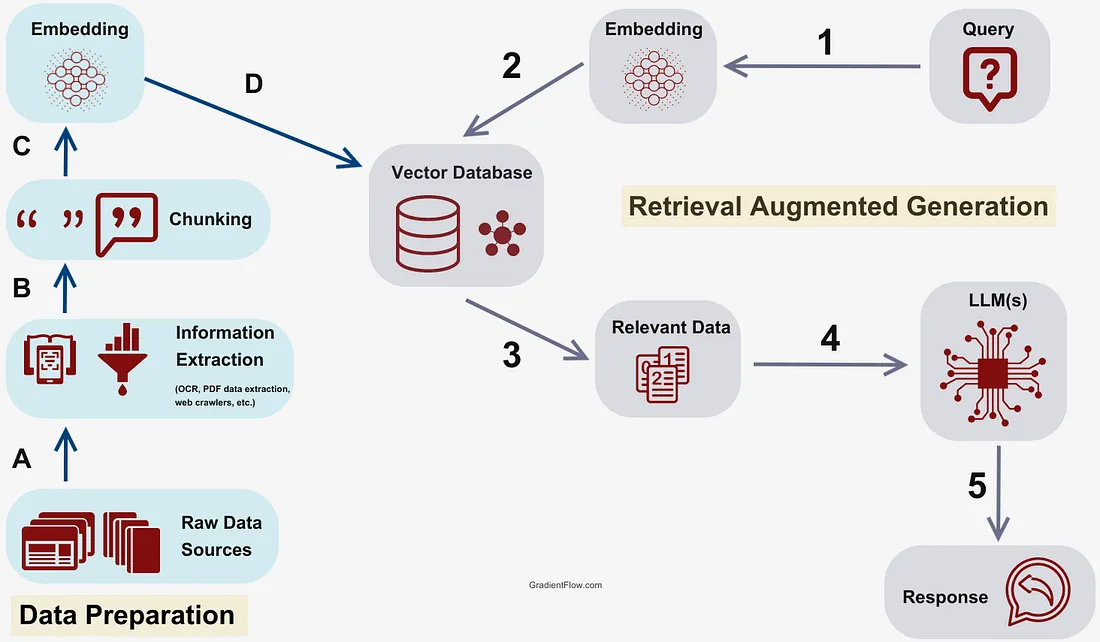



#### **Tools and Technologies for Building RAG Systems**

1. **Vector Databases**:
   - **Pinecone**: Used to store and search document embeddings for fast retrieval.
   - **FAISS**: An open-source tool for efficient similarity search and clustering of dense vectors.

2. **LLM Integration**:
   - **Ollama's LLaMA**: A popular model for generative tasks that can be integrated with retrieval mechanisms.
   - **GPT Models**: OpenAI’s GPT models are frequently used in RAG architectures to generate text based on retrieved data.

3. **Document Chunking**:
   - **Apache Spark/PySpark**: Commonly used for splitting large documents into manageable chunks to improve retrieval and contextual relevance.

4. **Embedding Models**:
   - **Sentence-BERT**: A fine-tuned BERT model used for producing sentence-level embeddings for document retrieval.
   - **OpenAI Embedding API**: Provides high-quality embeddings that can be used for indexing and searching large corpora.

5. **Storage Solutions**:
   - **PostgreSQL with pgvector**: This enables the storage of vector embeddings alongside traditional relational data, facilitating the integration of retrieval and generation workflows.



#### **RAG Use Cases and Solutions**

- **Client-Specific Knowledge Retrieval**: A company can build a RAG system to retrieve client-specific data and generate personalized reports or responses.
  
- **Documentation Generation**: Developers can use RAG to generate documentation from codebases, pulling relevant code snippets and comments to form coherent documents.

- **Legal Document Analysis**: In legal tech, RAG can be used to retrieve case laws or regulations and generate detailed analysis or summaries, ensuring that the information is current and accurate.

## **Sample RAG application to use our own data with LLM**

We will use the following tools for our demonstration.

*   **Langchain** - an LLM Framework (will see deeper on tomorrow class)
*   **Sentence Transformers** - For breaking down the sentences
*   **FAISS** - Facebook AI Similarity Search - Product of Meta. This is for storing the vector embeddings locally (in Colab file system)
*   **Huggingface Embeddings** - Convert the chunked data into embeddings - We use MPNET: Masked and Permuted Pre-training for Language Understanding.
*   **Using colabxterm and run ollama locally** in Colab (This will give us the ability to run llama 3.1 model using google colab itself)




In [2]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [3]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.8 MB/s eta 0:00:00


In [4]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 6.3 MB/s eta 0:00:00


In [5]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 6.8 MB/s eta 0:00:00


In [6]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 6.9 MB/s eta 0:00:00


####**RAG Having Three main Stages**

1. Data Ingestion
2. Data Retrieval
3. Data Generation

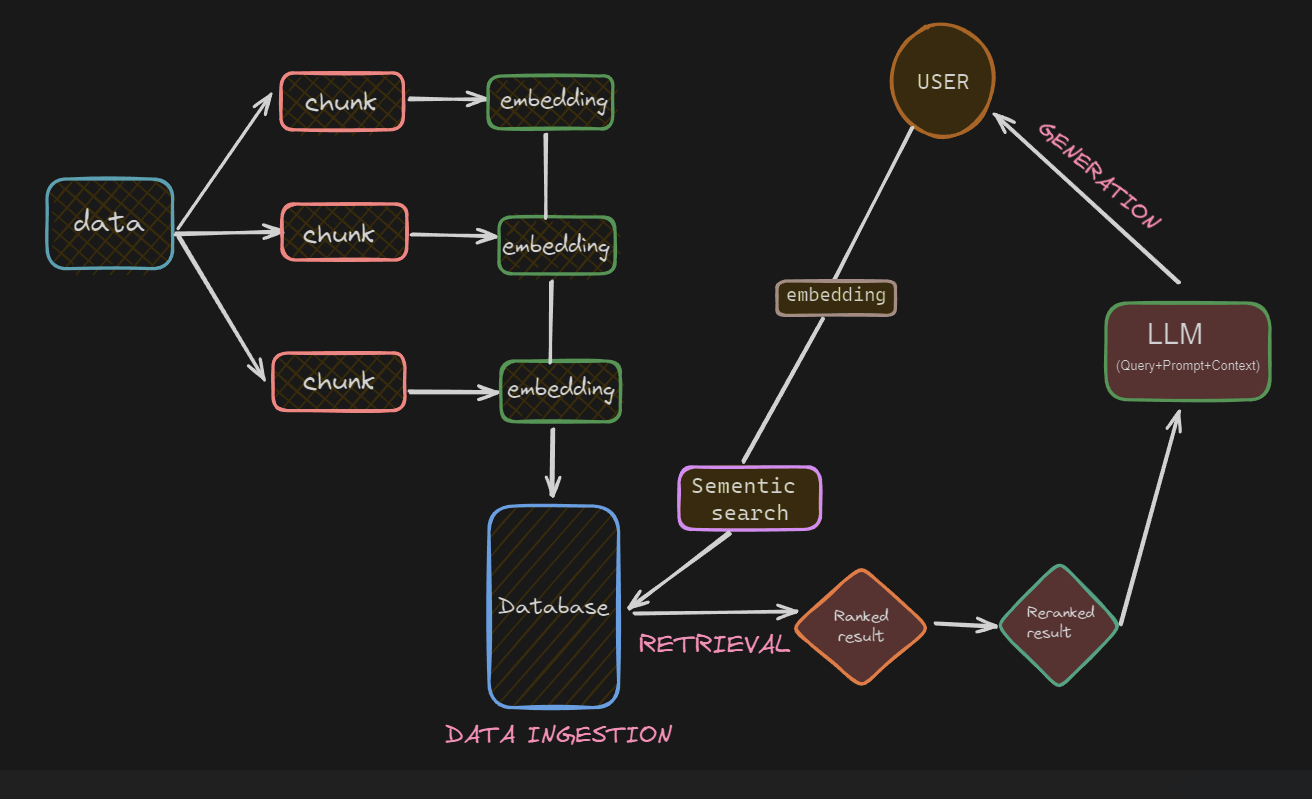

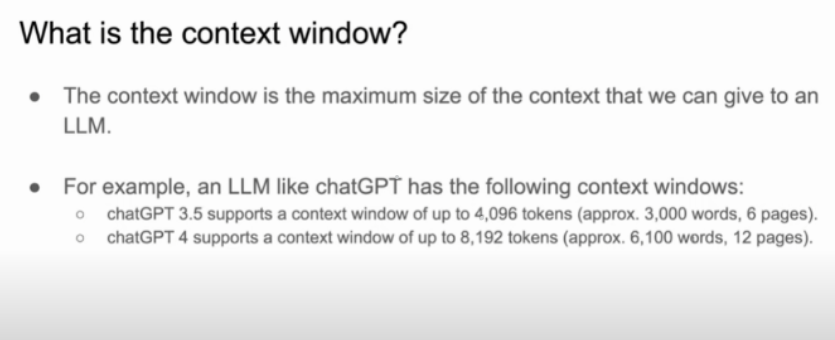

In [9]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from google.colab import files

In [10]:
# Load document using PyPDFLoader document loader
#loader = PyPDFLoader("/content/constitution_of_india.pdf")

uploaded = files.upload()

# Get the name of the uploaded file
pdf_file = list(uploaded.keys())[0]

# Load the PDF using PyPDFLoader
loader = PyPDFLoader(pdf_file)

documents = loader.load()

Saving Arul Benjamin CV.pdf to Arul Benjamin CV.pdf


In [11]:
#Splitting the data into chunk
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=30, separator="\n")
docs = text_splitter.split_documents(documents=documents)

print(docs)

[Document(metadata={'source': 'Arul Benjamin CV.pdf', 'page': 0}, page_content='Arul Benjamin Chandru Ebenezer\nVedanayagam\nChennai, Tamil Nadu, India |arulbenjaminchandru@gmail.com |+91-9894481283 |LinkedIn\nSummary\nSenior System Analyst with over 11 years of experience in Data Engineering, specializing in Azure and AWS.\nExpertise in Legacy Modernization, Generative AI, and advanced technologies such as RAG, LLM Fine Tuning, and\nLangchain. Proficient in Hybrid Cloud Data Architecture and Mainframe technologies. Committed to delivering\ninnovative solutions that drive business success and operational efficiencies.\nSkills\nData Engineering | Azure | AWS | Generative AI | Legacy Modernization | COBOL | DB2 | VSAM | CICS | ETL |\nSQL | Python\nProfessional Experience\nSenior System Analyst ,IBM Nov 2021 – Present\n•Serve as Hybrid Data Architect for a healthcare client, managing data workflows using AWS Glue and Azure\nData Factory\n•Perform complex ETL processes and data integration

####**MTEB: Massive Text Embedding Benchmark**

#### The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

BGE(BAAI general embedding)
BAAI: https://huggingface.co/BAAI

**Dataset size:**  Larger datasets generally benefit from more powerful models like MPNet.

**Computational resources:**  If you have limited resources, BGE Small En or MiniLM might be better options.

**Task complexity:**  For complex tasks like question answering or text summarization, MPNet is often preferred.

**Embedding dimensionality:**  Different models produce embeddings of varying dimensions.Choose based on downstream task requirements.

**Performance vs. efficiency trade-off:** Decide if you prioritize high accuracy or faster processing

#####Experimentation is key. Try different models and evaluate their performance on your specific task and dataset to find the best fit.

MPNET: Masked and Permuted Pre-training for Language Understanding.

https://huggingface.co/sentence-transformers

https://huggingface.co/spaces/mteb/leaderboard

https://huggingface.co/blog/mteb


In [12]:
#loading the embedding model from huggingface
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
  model_name=embedding_model_name,
  model_kwargs=model_kwargs
)

<ipython-input-12-7b620362e3e8>:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embeddings = HuggingFaceEmbeddings(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secr

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

####**Why Use FAISS**

1. Efficiency
2. Versatility
3. Scalability
4. Integration
5. GPU Support

# Security Considerations

1. Data Control
2. Reduced Exposure
3. Compliance
4. Latency and Performance
5. Network Security

In [13]:
'''
from langchain.vectorstores import FAISS
vectorstore=FAISS.from_documents(text_chunks, embeddings)
retriever=vectorstore.as_retriever()
'''

'\nfrom langchain.vectorstores import FAISS\nvectorstore=FAISS.from_documents(text_chunks, embeddings)\nretriever=vectorstore.as_retriever()\n'

In [14]:
#loading the data and correspond embedding into the FAISS
vectorstore = FAISS.from_documents(docs, embeddings)

In [15]:
# Persist the vectors locally on disk
vectorstore.save_local("faiss_index_")

In [16]:
# Load from local storage
persisted_vectorstore = FAISS.load_local("faiss_index_", embeddings,allow_dangerous_deserialization=True)

In [17]:
#creating a retriever on top of database
retriever = persisted_vectorstore.as_retriever()

In [18]:
!pip install langchain_ollama

In [19]:
#loading the llama3.1 model using Ollama
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 3.5 MB/s eta 0:00:00


curl -fsSL https://ollama.com/install.sh | sh

ollama serve & ollama pull llama3.1

In [27]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [28]:
from langchain_community.llms import Ollama

In [29]:
# Initialize an instance of the Ollama model
llm = Ollama(model="llama3.1")

In [30]:
# Invoke the model to generate responses
response = llm.invoke("Who is Arul Benjamin Chandru and what is his email id?")
print(response)

I cannot verify who Arul Benjamin Chandru is or provide their email address. Is there anything else I can help you with?


In [ ]:
'''from langchain_ollama.llms import OllamaLLM
#loading the ollama model
model = OllamaLLM(model="llama3.1")'''

'from langchain_ollama.llms import OllamaLLM\n#loading the ollama model\nmodel = OllamaLLM(model="llama3.1")'

In [31]:
 #Use RetrievalQA chain for orchestration
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)

In [32]:
while True:
  query = input("Type your query if you want to exit type Exit: \n")
  if query == "Exit":
    break
  result = qa.run(query)
  print(result)

Type your query if you want to exit type Exit: 
Who is Arul Benjamin Chandru and what is his email id?


<ipython-input-32-2c2904b563cb>:5: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  result = qa.run(query)


Arul Benjamin Chandru Ebenezer Vedanayagam's full name is not explicitly provided, but he goes by the first name "Arul Benjamin Chandru" as per the profile. His email ID is arulbenjaminchandru@gmail.com.
Type your query if you want to exit type Exit: 
Exit
